In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Added confusion_matrix import
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


In [23]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
items = pd.read_csv(r'C:\Users\prave\Downloads\Reviews\20191226-items.csv')
reviews = pd.read_csv(r'C:\Users\prave\Downloads\Reviews\20191226-reviews.csv')

In [25]:
print(items.head())
print(reviews.head())

         asin     brand                                              title  \
0  B0000SX2UC       NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0009N5L7K  Motorola                                Motorola I265 phone   
2  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3  B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   
4  B001DCJAJG  Motorola      Motorola V365 no contract cellular phone AT&T   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3  https://www.amazon.com/Motorola-i335-Phone-Boo...   
4  https://www.amazon.com/Motorola-V365-contract-...   

                                               image  rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
1  https://m.media-amazon.com/images/I/419WBAVDAR...     3.0   
2 

In [26]:
data = pd.merge(reviews, items, on='asin')
print(data.head())

         asin           name  rating_x               date  verified  \
0  B0000SX2UC          Janet         3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt         1    January 7, 2004     False   
2  B0000SX2UC         Brooke         5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague         3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer         4    August 28, 2005     False   

                                        title_x  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes brand  \
0  I had the Samsung A600 for awhile which is abs...           1.0   NaN   
1  Due to a software issue between Nokia and Spri...          17.0   NaN   
2  This is a great, reliable phone. I 

In [27]:
print(data.columns)

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'url', 'image', 'rating_y',
       'reviewUrl', 'totalReviews', 'price', 'originalPrice'],
      dtype='object')


In [28]:
# Keep relevant columns (adjust based on available columns)
# Ensuring that the columns exist in the dataframe
required_columns = ['asin', 'name_x', 'rating_x', 'verified', 'title', 'body']
available_columns = [col for col in required_columns if col in data.columns]
data = data[available_columns]

In [29]:
# Rename columns to standardize names
column_mapping = {
    'name_x': 'name',
    'rating_x': 'rating',
    'title': 'title',
    'body': 'review'
}
data = data.rename(columns=column_mapping)

In [30]:
# Check for missing values in required columns and handle them
data = data.dropna(subset=['review', 'rating'])

In [31]:
# Preprocess the review text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [32]:
data['review'] = data['review'].apply(preprocess_text)

In [33]:
# Define the target variable (sentiment) based on rating
data['sentiment'] = np.where(data['rating'] >= 4, 1, 0)


In [34]:
# Generate Word Cloud
combined_text = " ".join(data['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

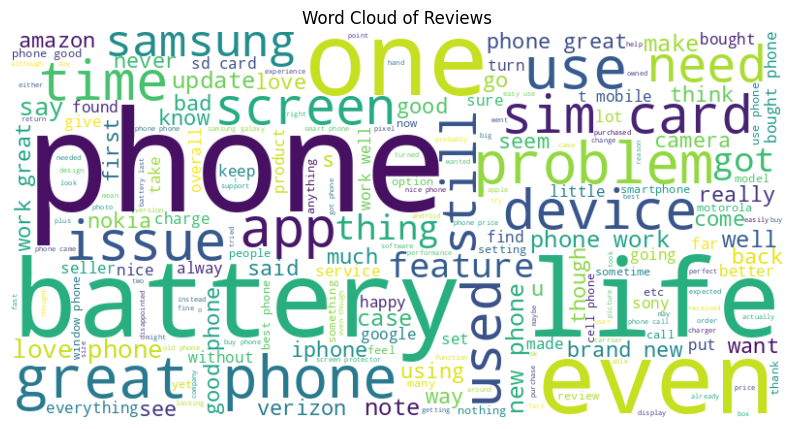

In [35]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [36]:
# Prepare the data for model training
X = data['review']
y = data['sentiment']


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Build a pipeline for text classification
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())  # Ensure MultinomialNB is imported correctly
])


In [39]:
# Train the model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [40]:
# Make predictions
y_pred = text_clf.predict(X_test)

In [41]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2532 1823]
 [ 253 8984]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      4355
           1       0.83      0.97      0.90      9237

    accuracy                           0.85     13592
   macro avg       0.87      0.78      0.80     13592
weighted avg       0.86      0.85      0.84     13592


Accuracy Score:
0.8472630959387876


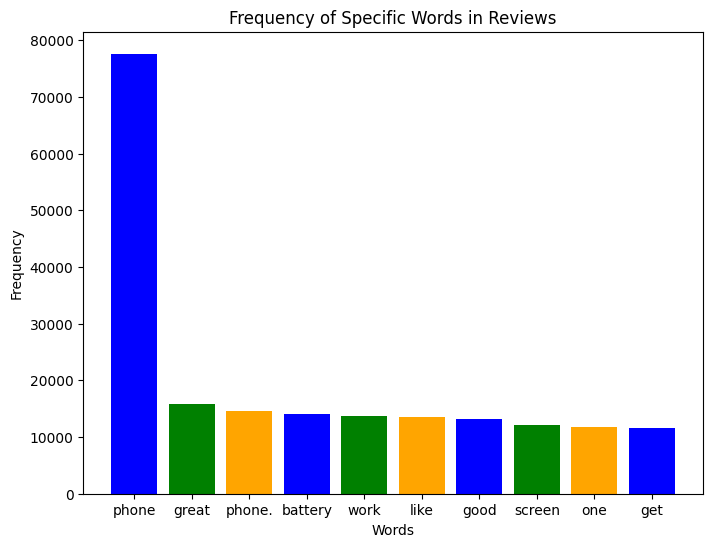

In [42]:
# Plotting
target_word_count = pd.Series(' '.join(data['review']).split()).value_counts()[:10]
plt.figure(figsize=(8, 6))
plt.bar(target_word_count.index, target_word_count.values, color=['blue', 'green', 'orange'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Specific Words in Reviews')
plt.show()